<a href="https://colab.research.google.com/github/basanab/mu_e_scatt/blob/main/ML_modl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from scipy.optimize import curve_fit 


In [3]:
df=pd.read_excel("/content/drive/MyDrive/ColabNotebooks/muon_data.xlsx")
df

,E_mu,Theta_e,Theta_mu,Emu_p,Ee_p
0,0.5,0.000,0.000000,0.478659,0.021841
1,0.5,0.001,0.000047,0.478659,0.021841
2,0.5,0.002,0.000093,0.478661,0.021839
3,0.5,0.003,0.000140,0.478663,0.021837
4,0.5,0.004,0.000187,0.478666,0.021834
...,...,...,...,...,...
99995,1000.0,0.045,0.000022,999.507086,0.493414
99996,1000.0,0.046,0.000022,999.528302,0.472198
99997,1000.0,0.047,0.000021,999.548180,0.452320
99998,1000.0,0.048,0.000021,999.566829,0.433671


In [17]:
# Create a copy for further processing
dataset = df.copy()
# Check for null values
dataset.isna().sum()

E_mu        0
Theta_e     0
Theta_mu    0
Emu_p       0
Ee_p        0
dtype: int64

In [18]:
# Split the Dataset and create train and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(100000, 5) (80000, 5) (20000, 5)


,count,mean,std,min,25%,50%,75%,max
E_mu,80000.0,500.062487,288.479844,0.500000,250.500000,500.000000,749.500000,1000.000000
Theta_e,80000.0,0.024507,0.014416,0.000000,0.012000,0.024000,0.037000,0.049000
Theta_mu,80000.0,0.000353,0.000722,0.000000,0.000050,0.000103,0.000277,0.004831
Emu_p,80000.0,474.953185,293.400435,0.478659,218.546809,469.755885,728.050440,999.584348
Ee_p,80000.0,25.109803,93.816816,0.020753,0.728710,1.596609,6.753889,989.401531


In [6]:
# # Remove columns not needed
# dataset_size2=dataset.drop(['E_mu', 'Emu_p','Ee_p'], axis=1)
# dataset_size2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Theta_e,100000.0,0.024500,0.014431,0.0,0.01200,0.024500,0.037000,0.049000
Theta_mu,100000.0,0.000354,0.000723,0.0,0.00005,0.000103,0.000278,0.004831


In [19]:
# Separate labels and features
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("E_mu")
test_labels = test_features.pop("E_mu")

In [21]:
print(train_features)
print(test_features)
print(train_labels)
print(test_labels)

       Theta_e  Theta_mu       Emu_p      Ee_p
3582     0.032  0.000861   35.057298  0.943202
60498    0.048  0.000034  604.566955  0.433545
53227    0.027  0.000070  531.132519  1.367981
21333    0.033  0.000142  212.586521  0.913979
3885     0.035  0.000728   38.205546  0.794954
...        ...       ...         ...       ...
27389    0.039  0.000094  273.344839  0.655661
8871     0.021  0.000533   86.796015  2.204485
47812    0.012  0.000174  471.657751  6.842749
4539     0.039  0.000561   44.854729  0.645771
51018    0.018  0.000109  507.433180  3.067320

[80000 rows x 4 columns]
       Theta_e  Theta_mu       Emu_p      Ee_p
2        0.002  0.000093    0.478661  0.021839
10       0.010  0.000466    0.478706  0.021794
13       0.013  0.000605    0.478739  0.021761
20       0.020  0.000926    0.478848  0.021652
21       0.021  0.000971    0.478867  0.021633
...        ...       ...         ...       ...
99966    0.016  0.000062  996.109777  3.890723
99971    0.021  0.000048  997.7382

In [22]:
#normalisation
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
label_scaler = StandardScaler()
# Fit on Training Data
feature_scaler.fit(train_features.values)
label_scaler.fit(train_labels.values.reshape(-1, 1))

StandardScaler()

In [24]:
# Transform both training and testing data
train_features = feature_scaler.transform(train_features.values)
test_features = feature_scaler.transform(test_features.values)
train_labels = label_scaler.transform(train_labels.values.reshape(-1, 1))
test_labels = label_scaler.transform(test_labels.values.reshape(-1, 1))

In [25]:
# Now let's create a Deep Neural Network to train a regression model on our data.
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


In [26]:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',
    
)


In [27]:
model.compile(optimizer="Adam",
               loss="mean_squared_error")

In [28]:
# Now let's train the model
history = model.fit(epochs=100, x=train_features, y=train_labels,
          validation_data=(test_features, test_labels), verbose=0)

In [29]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

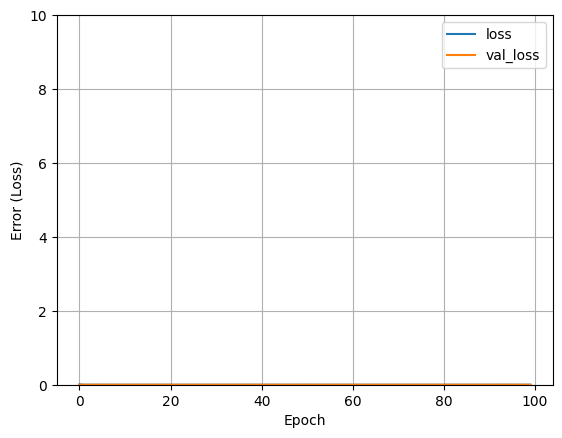

In [30]:
plot_loss(history)

In [31]:
# Model evaluation on testing dataset
model.evaluate(test_features, test_labels)

625/625 [==============================] - 1s 1ms/step - loss: 1.6079e-07


1.6078581666079117e-07

In [33]:
#Save model 
model.save("correct_ML_mdl.h5")

In [34]:
# Load and perform predictions
results = model.predict(test_features)

625/625 [==============================] - 1s 1ms/step


In [35]:
# We can decode using the scikit-learn object to get the result
decoded_result = label_scaler.inverse_transform(results.reshape(-1,1))
print(decoded_result)
print(decoded_result.shape)
decoded_testlabels =label_scaler.inverse_transform(test_labels)

[[5.50982356e-01]
 [5.89037776e-01]
 [6.03258967e-01]
 ...
 [1.00006598e+03]
 [1.00008447e+03]
 [1.00008923e+03]]
(20000, 1)


Text(0, 0.5, 'Predicted Energy (GeV)')

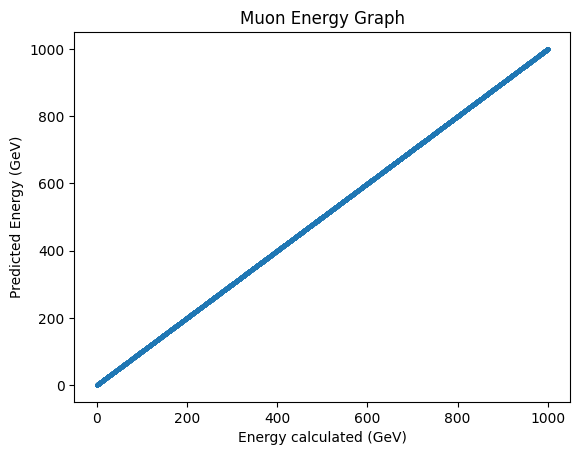

In [36]:
plt.scatter(decoded_testlabels, decoded_result, s=3)
plt.title("Muon Energy Graph")
plt.xlabel("Energy calculated (GeV)")
plt.ylabel("Predicted Energy (GeV)")

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0., 

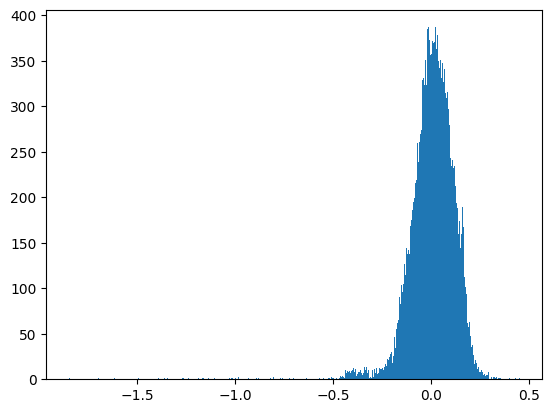

In [37]:
diff= decoded_result- decoded_testlabels
plt.hist(diff,bins= 500)

In [39]:
def gauss(x,amp,mu,sigma):
    return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)

This is n==> [  0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   1.   0.   4.   0.   1.   1.   1.   2.   3.   1.   1.
   0.   0.   2.   8.   2.   1.   4.   2.   2.   6.   2.   2.   4.   5.
   2.   4.   4.   3.   2.   6.   4.   5.   6.   2.   6.   6.   2.   4.
   5.   7.   4.   3.   1.   3.   2.   2.   4.   3.   4.   4.   4.   3.
   4.   6.   2.   1.   1.   5.   4.   2.   4.   5.   6.   4.   7.   2.
   7.   4.   5.   6.   4.   2.   4.   6.   1.   0.   1.   0.   2.   0.
   1.   4.   5.   5.   1.   1.   2.   4.   5.   2.   4.   0.   6.   5.
   7.   2.   2.   4.   3.   3.   6.   7.   3.   4.   6.   4.   3.   7.
   6.   5.   6.   7.   1.   3.   8.   8.   6.   9.   8.   5.   8.   9.
  11.   6.  13.  10.  12.   8.  16.   8.  10.  14.  12.  12.   8.   9.
  15.   5.  18.  18.  20.  13.  15.  26.  25.  18.  24.  31.  27.  40.
  37.  31.  38.  41.  39.  50.  53.  44.  47.  35.  36.  55.  40.  48.
  52.  65.  54.  44.  56.  67.  58.  60.  61.  58.  67.  64.  60

<ipython-input-39-679ff3a10ba0>:2: RuntimeWarning: invalid value encountered in sqrt
  return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)


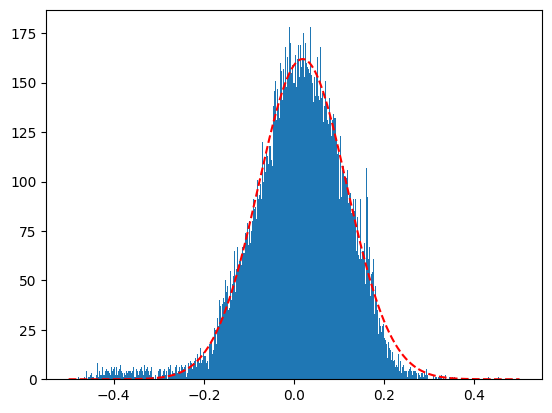

In [40]:
x= np.linspace(-0.5,0.5,500)
n,bins,patches = plt.hist(diff,bins= 500,range= (-0.5,0.5))#, ); # range= (-0.5,1.5)
print("This is n==>",n, bins, patches)
y=n 
print(max(y))
popt, pcov = curve_fit(gauss, x,y)#p0= (300,0.0,0.5)) # p0= (amp, mean, satndard deviation)===> guessed
y= gauss(x, popt[0], popt[1], popt[2])
plt.plot(x,y,color= 'r', linestyle='dashed', label='fit function');
print(popt[0],popt[1],popt[2]) # gives actual (amp, mean, standard deviation)
# plt.show()